In [2]:
# Esport Earning from 1998 to 2020 dataset

# i'm a bit interested how valorant will do, so we shall see...

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/MyDrive/KaggleDatasets/EsportEarning'

GeneralEsportData.csv  HistoricalEsportData.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

gen_df = pd.read_csv('gdrive/MyDrive/KaggleDatasets/EsportEarning/GeneralEsportData.csv', encoding='cp1252') # what is this encoding tho
gen_df.head(3)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,190075.61,156839.89,246,95
1,Age of Empires II,1999,Strategy,1689260.72,618974.87,1105,729
2,Age of Empires III,2005,Strategy,68113.85,41500.00,106,76


In [5]:
hist_df = pd.read_csv('gdrive/MyDrive/KaggleDatasets/EsportEarning/HistoricalEsportData.csv', encoding='cp1252') 
hist_df.head(3)

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1


In [6]:
# i don't really want to merge these together as one dataset is time-series, maybe i'll create some features from the historical data
# lets just get some sense and plot some things from the general dataset

gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              513 non-null    object 
 1   ReleaseDate       513 non-null    int64  
 2   Genre             513 non-null    object 
 3   TotalEarnings     513 non-null    float64
 4   OnlineEarnings    513 non-null    float64
 5   TotalPlayers      513 non-null    int64  
 6   TotalTournaments  513 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 28.2+ KB


In [7]:
gen_df.describe()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,513.000000,5.130000e+02,5.130000e+02,513.000000,513.000000
mean,2011.097466,1.814013e+06,1.418232e+06,191.875244,82.947368
std,6.962389,1.287577e+07,1.092088e+07,810.625492,421.808184
min,1981.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2006.000000,1.395970e+03,0.000000e+00,4.000000,1.000000
50%,2013.000000,3.886862e+04,2.006400e+04,21.000000,5.000000
75%,2017.000000,2.160000e+05,1.465548e+05,91.000000,25.000000
max,2020.000000,2.294455e+08,2.136104e+08,13394.000000,6062.000000


* All these data is from 1981 to 2020, although 75% of games are after 2006. Not so surprising.
* Pretty huge difference in terms of TotalEarning,wow. Same for OnlineEarnings, which I thought will be lower, huh.
* There is a game where almost 14k players had received a prize, damn, I shouldn't have missed out on that one. Bummer.
* Great variance in TotalTournament as well. 


In [8]:
gen_df.isna().sum() # how lovely !

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OnlineEarnings      0
TotalPlayers        0
TotalTournaments    0
dtype: int64

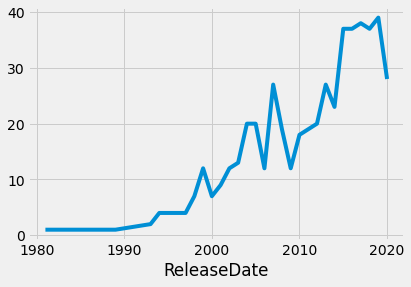

In [9]:
gen_df.groupby('ReleaseDate').size().plot()

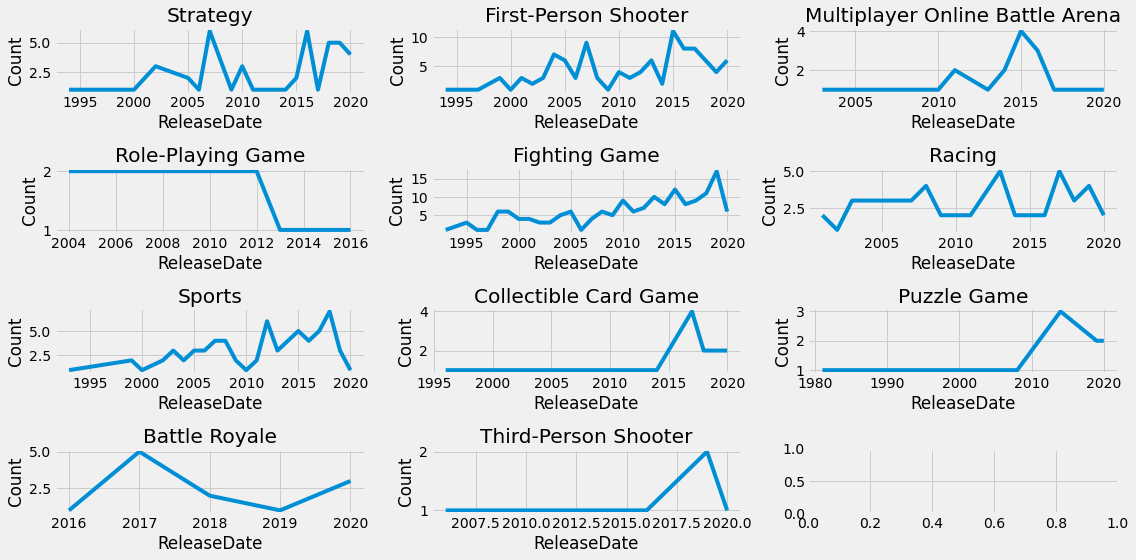

In [112]:
fig, axs = plt.subplots((len(gen_df.Genre.unique())//3)+1,3, figsize=(16, 8))
for ix, genre in enumerate(gen_df.Genre.unique()):
  df = gen_df[gen_df.Genre == genre ] 
  df.groupby('ReleaseDate').size().plot(ax=axs[ix//3, ix%3], title=genre, xlabel=None, ylabel='Count')

plt.tight_layout()

In [108]:
gen_df[gen_df.Genre=="First-Person Shooter"].sort_values(by="ReleaseDate").tail(10)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
58,Beat Aim,2019,First-Person Shooter,430.00,0.00,12,6
75,Call of Duty: Modern Warfare,2019,First-Person Shooter,6617284.50,643562.50,257,45
61,Borderlands 3,2019,First-Person Shooter,50000.00,0.00,16,1
74,Call of Duty: Mobile,2019,First-Person Shooter,0.00,0.00,0,0
97,Escape from Tarkov,2020,First-Person Shooter,114600.00,0.00,150,4
110,Halo: Infinite,2020,First-Person Shooter,0.00,0.00,0,0
149,VALORANT,2020,First-Person Shooter,2276376.65,210228.00,2165,296
69,Call of Duty: Black Ops Cold War,2020,First-Person Shooter,248000.00,0.00,83,10
91,Diabotical,2020,First-Person Shooter,158210.64,15642.09,256,96
78,Call of Duty: Warzone,2020,First-Person Shooter,3241802.12,0.00,734,123


In [105]:
gen_df[gen_df.Game.str.contains("FIFA")] # yeah this exaplains the sports genre's stable yearly released number of games

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
399,FIFA 03,2002,Sports,54066.44,54066.44,10,3
400,FIFA 04,2003,Sports,40000.00,40000.00,3,3
401,FIFA 05,2004,Sports,57728.01,57728.01,5,8
402,FIFA 06,2005,Sports,112464.53,112464.53,23,12
403,FIFA 07,2006,Sports,237812.23,237812.23,42,13
404,FIFA 08,2007,Sports,207129.94,207129.94,68,17
405,FIFA 09,2008,Sports,121618.34,115321.42,52,19
406,FIFA 10,2009,Sports,117026.71,90147.21,64,48
407,FIFA 11,2010,Sports,93983.77,85154.02,72,78
408,FIFA 12,2011,Sports,54431.52,47279.42,53,66


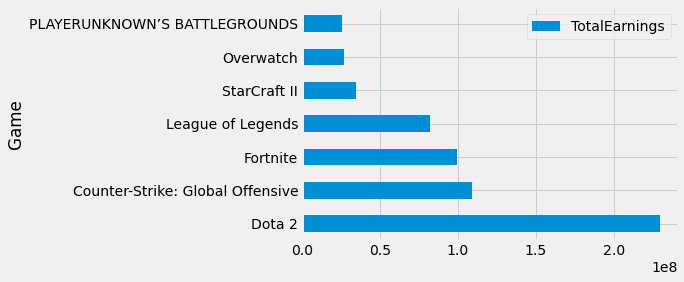

In [37]:
gen_df.sort_values(by='TotalEarnings', ascending=False)[['Game', 'TotalEarnings']].head(7).set_index('Game').plot.barh() 
# need set_index otherwise the game name is just an index 

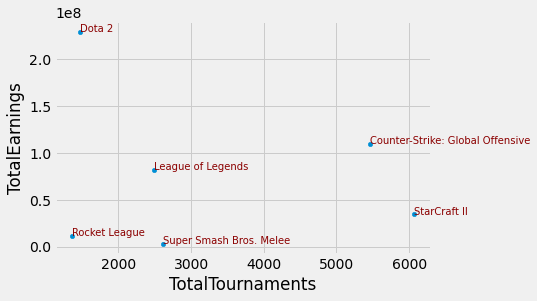

In [81]:
fig, ax = plt.subplots()
tops = gen_df.sort_values(by='TotalTournaments', ascending=False).head(6)
tops.plot(x='TotalTournaments', y='TotalEarnings', kind='scatter', ax=ax)
tops.reset_index(inplace=True)

for i in range(tops.shape[0]):
  plt.text(x=tops.TotalTournaments.iloc[i], y=tops.TotalEarnings.iloc[i], s=tops.Game.iloc[i],fontdict=dict(color='darkred', size=10))

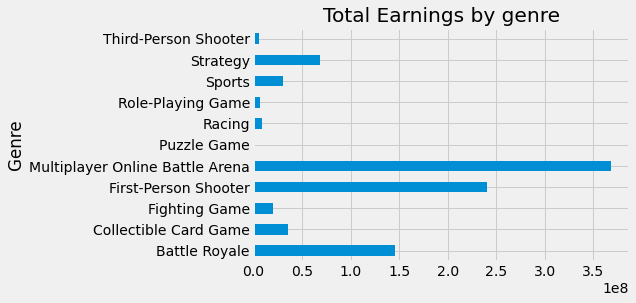

In [87]:
gen_df.groupby('Genre')['TotalEarnings'].sum().plot.barh(title='Total Earnings by genre')

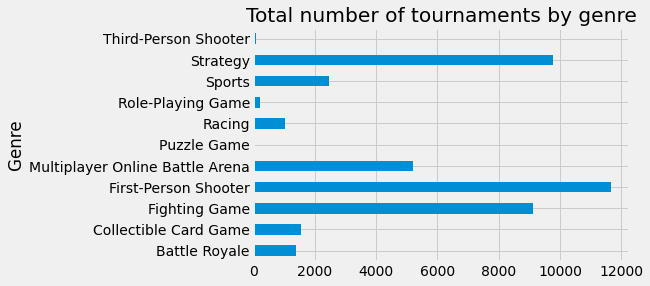

In [88]:
gen_df.groupby('Genre')['TotalTournaments'].sum().plot.barh(title="Total number of tournaments by genre")

In [91]:
gen_df.sort_values(by="TotalPlayers", ascending=False).head(10)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
83,Counter-Strike: Global Offensive,2012,First-Person Shooter,1.092612e+08,7.537525e+07,13394,5459
166,League of Legends,2009,Multiplayer Online Battle Arena,8.203134e+07,7.412764e+07,7202,2491
495,Fortnite,2017,Battle Royale,9.936292e+07,4.212462e+07,4459,673
80,Counter-Strike,2000,First-Person Shooter,1.352966e+07,1.281643e+07,4141,997
161,Dota 2,2013,Multiplayer Online Battle Arena,2.294455e+08,2.136104e+08,3934,1476
116,Overwatch,2016,First-Person Shooter,2.675032e+07,1.822746e+07,3532,747
499,PLAYERUNKNOWN’S BATTLEGROUNDS,2017,Battle Royale,2.560507e+07,1.989700e+07,2942,322
470,Hearthstone,2014,Collectible Card Game,2.415198e+07,1.848218e+07,2431,902
149,VALORANT,2020,First-Person Shooter,2.276377e+06,2.102280e+05,2165,296
32,StarCraft II,2010,Strategy,3.444557e+07,2.904888e+07,2087,6062


# Historical data 

In [14]:
hist_df.head(5)

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1
3,1998-07-01,QuakeWorld,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


In [15]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6464 non-null   object 
 1   Game         6464 non-null   object 
 2   Earnings     6464 non-null   float64
 3   Players      6464 non-null   int64  
 4   Tournaments  6464 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 252.6+ KB


In [16]:
hist_df.describe()

,Earnings,Players,Tournaments
count,6.464000e+03,6464.000000,6464.000000
mean,1.441151e+05,51.386603,6.575804
std,9.452597e+05,117.128815,12.363085
min,0.000000e+00,0.000000,1.000000
25%,1.000000e+03,5.000000,1.000000
50%,9.166060e+03,15.000000,2.000000
75%,5.471584e+04,43.000000,6.000000
max,3.671356e+07,1699.000000,172.000000


In [17]:
hist_df.isna().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64

In [18]:
hist_df.groupby('Game')['Tournaments'].sum().sort_values(ascending=False).head(5)

Game
StarCraft II                        6065
Counter-Strike: Global Offensive    5464
Super Smash Bros. Melee             2614
League of Legends                   2490
Dota 2                              1477
Name: Tournaments, dtype: int64

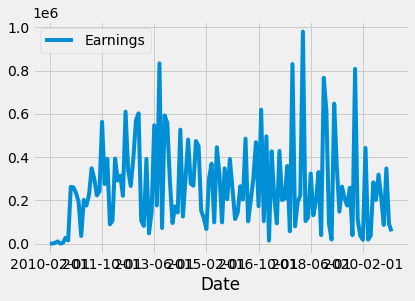

In [20]:
sc = hist_df[hist_df.Game == 'StarCraft II']
sc.plot(y='Earnings', x='Date')
plt.show()

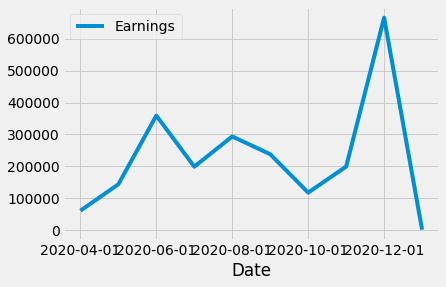

In [95]:
val = hist_df[hist_df.Game=='VALORANT']
val.plot(y='Earnings', x='Date')
plt.show()


In [102]:
val

,Date,Game,Earnings,Players,Tournaments
5930,2020-04-01,VALORANT,60580.80,292,51
5972,2020-05-01,VALORANT,143371.36,328,45
6012,2020-06-01,VALORANT,358980.03,705,56
6123,2020-07-01,VALORANT,198643.68,613,42
6171,2020-08-01,VALORANT,293528.55,334,35
6239,2020-09-01,VALORANT,237681.62,303,26
6291,2020-10-01,VALORANT,117409.01,178,13
6338,2020-11-01,VALORANT,198927.55,121,7
6371,2020-12-01,VALORANT,666254.05,575,20
6431,2021-01-01,VALORANT,1000.00,5,1


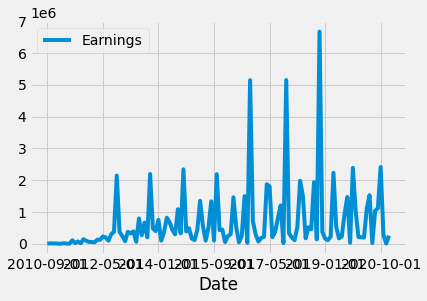

In [97]:
lol = hist_df[hist_df.Game=='League of Legends']
lol.plot(y='Earnings', x='Date')
plt.show()

In [101]:
lol[lol.Earnings == lol['Earnings'].max()].Date  # the LOL worlds championship is in november, so it makes sense 

4815    2018-11-01
Name: Date, dtype: object

In [ ]:
# Okay, that's it for today, I'm not particularly interested in this dataset :/
#
# this is actually not a bad dataset to practice time-series predictions, i might come back later :) 
#
# CONCLUSION: looking back I could've done more, also the vizs are kind plain, they could use some flavor 